In [9]:
import os
import json
import glob
import gzip
import pickle
import mantel
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from networkx import edge_betweenness_centrality

import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

# Invasive clusters exploration

In [3]:
# Load configuration
with open("../../config/config_notebooks_HER2.json", "r") as config_file:
    config = json.load(config_file)

with gzip.open(config['patches_info_path'], "rb") as f:
    patches_info = pickle.load(f)

In [4]:
# Specify the model you want to look at the representative patches and the number of clusters associated to it
model_of_interest = "uni"
n_clust_of_interest = 7

if model_of_interest in config['retrained_model_list1']:
    benchmark_path = config['retrained_benchmark_folder1']
else:
    benchmark_path = config['retrained_benchmark_folder2']

with open(os.path.join(benchmark_path, "invasive_cancer_clustering", config['invasive_cancer_clustering_algo'], model_of_interest, f"representative_patches_{n_clust_of_interest}_clusters_umap.json"), "r") as f:
    data_dict = json.load(f)

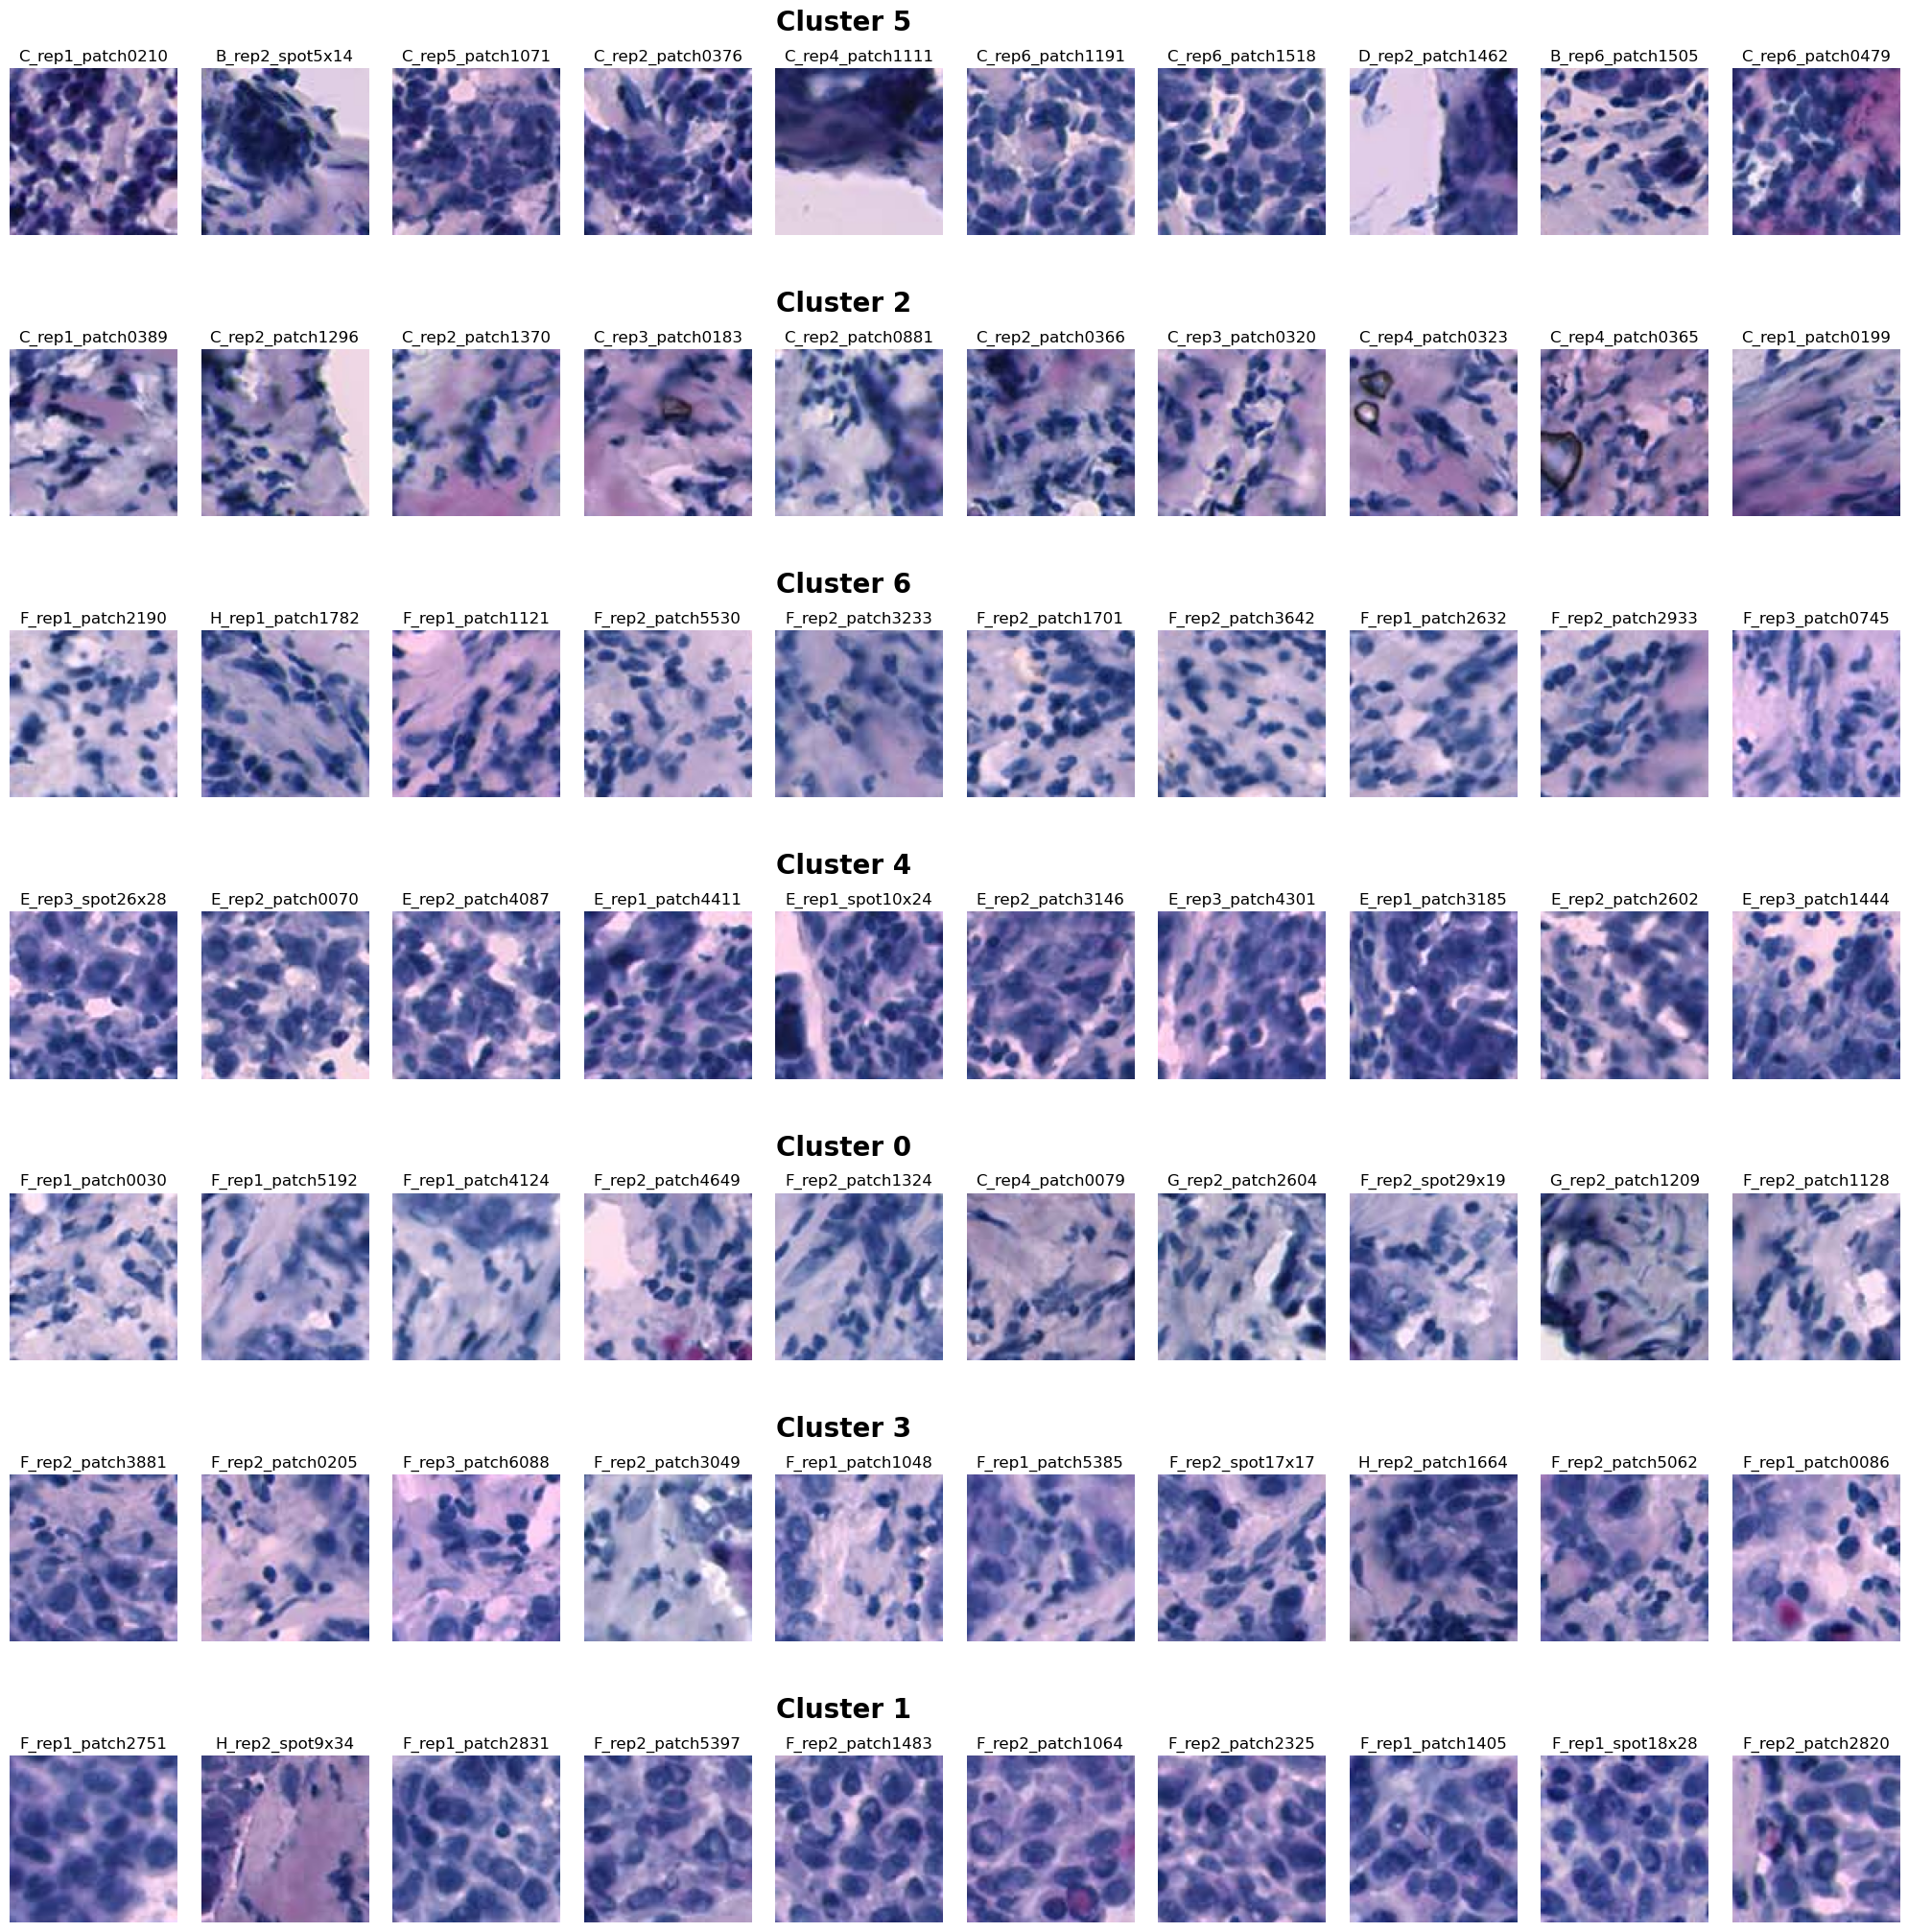

In [5]:
# Create a dictionary to map patch names to their paths
patches_dict = {patch['name']: patch['path'] for patch in patches_info}

# Determine the maximum number of samples in any cluster
max_samples = max(len(samples) for samples in data_dict.values())

# Plot the images
plt.figure(figsize=(20, 3 * len(data_dict)))
for row, (key, samples) in enumerate(data_dict.items()):
    for col in range(max_samples):
        plt.subplot(len(data_dict), max_samples, row * max_samples + col + 1)
        if col < len(samples):
            sample = samples[col]
            img_path = patches_dict.get(sample)
            if img_path:
                img = mpimg.imread(img_path)
                plt.imshow(img)
                plt.title(sample)
        plt.axis('off')
        
        if col == int(np.floor(max_samples/2) - 1):
            plt.text(s=f'Cluster {key}', x=0, y=-20, ha='left', va='bottom', fontsize=20, weight='bold')

plt.tight_layout()
plt.show()

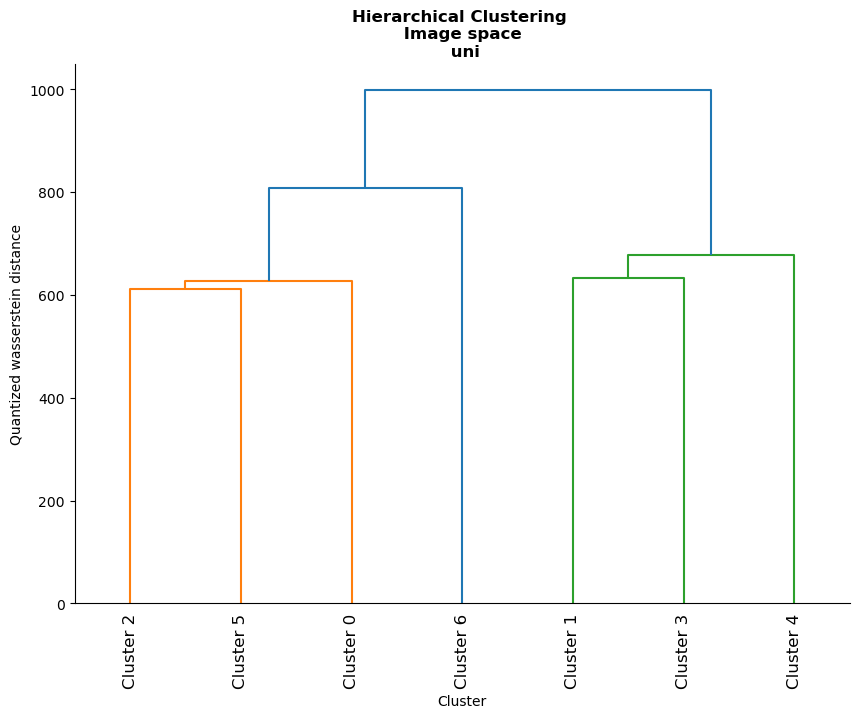

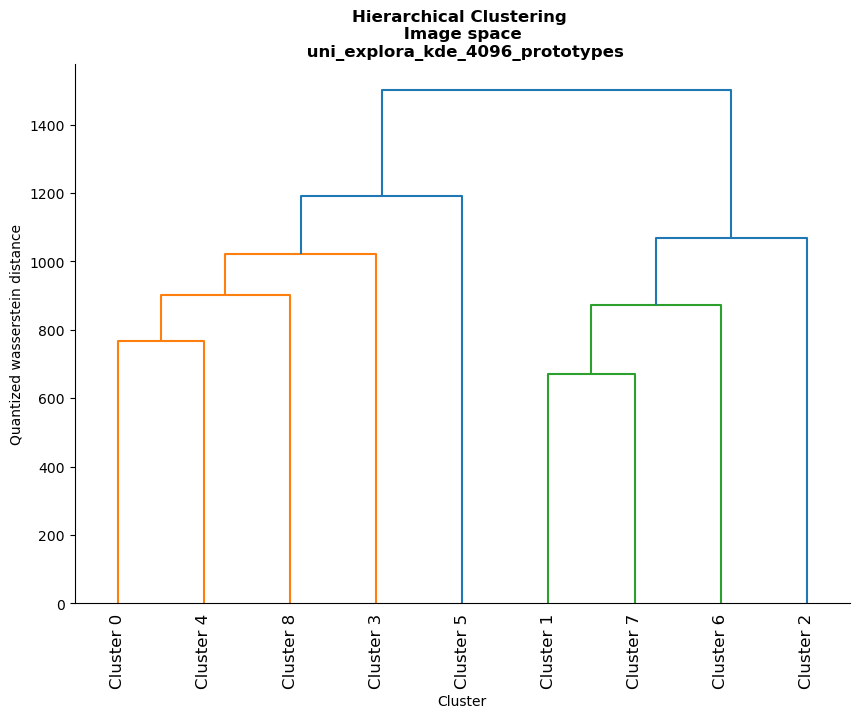

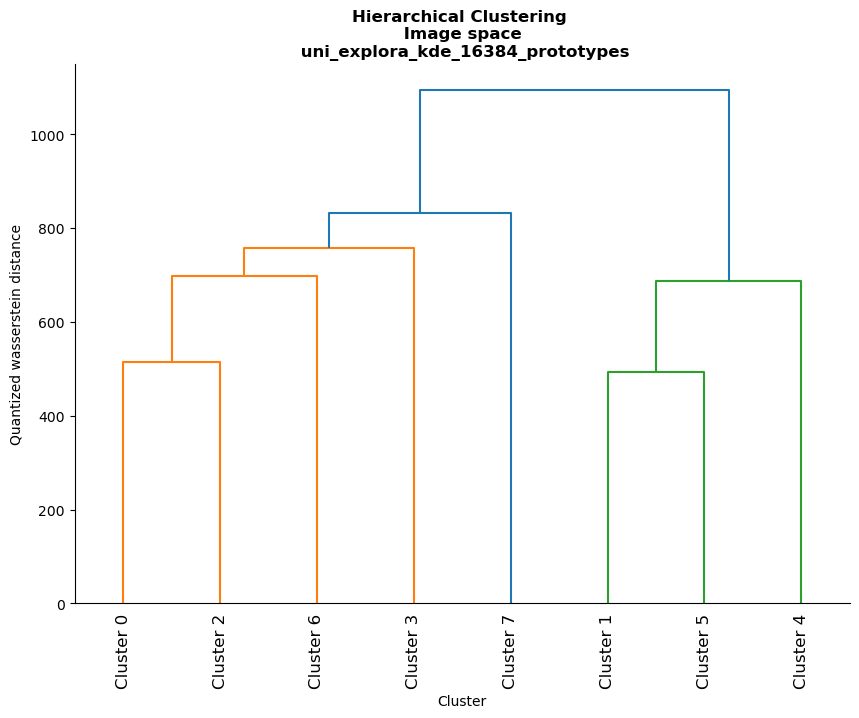

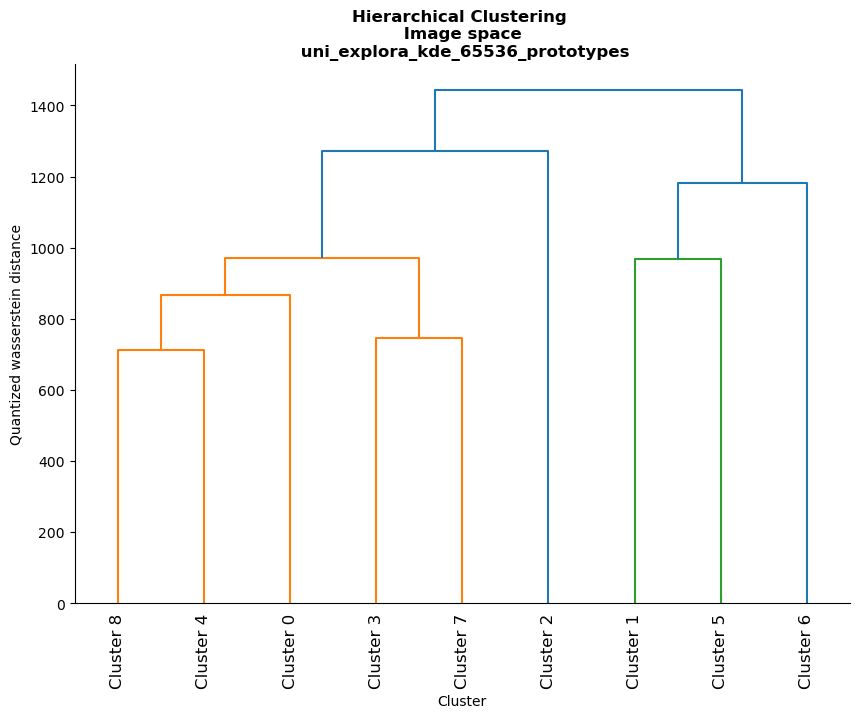

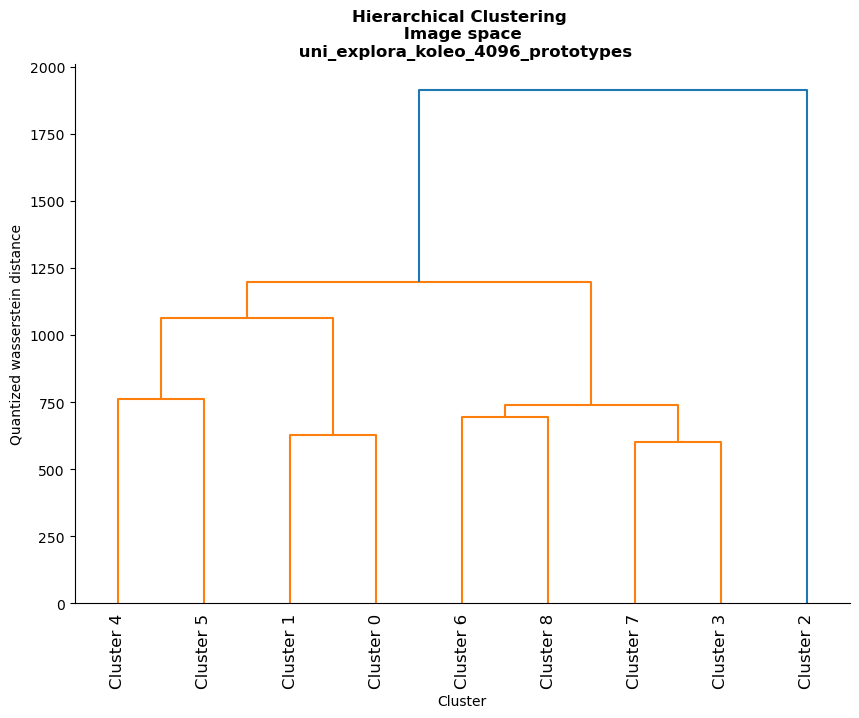

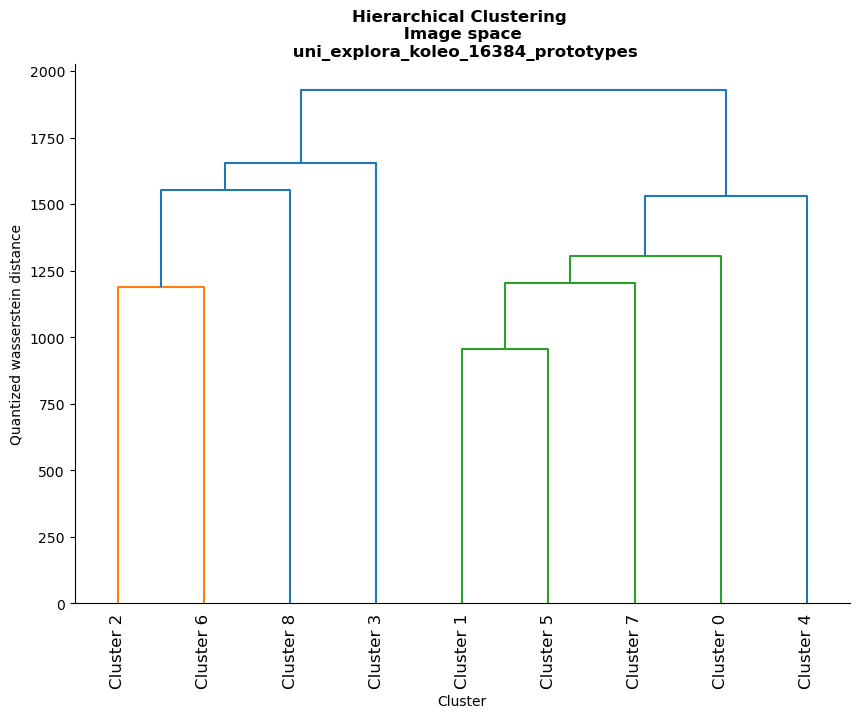

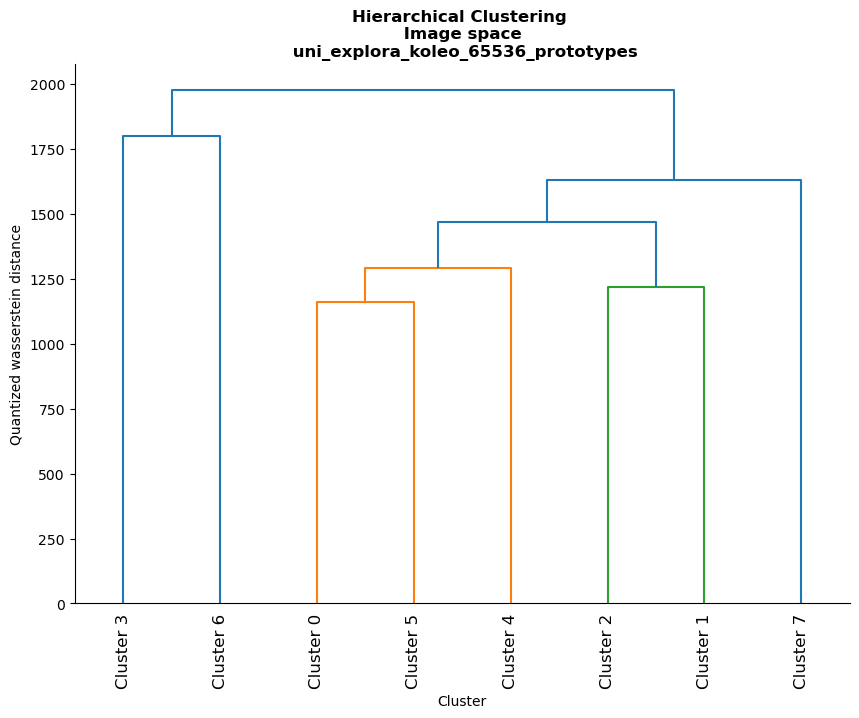

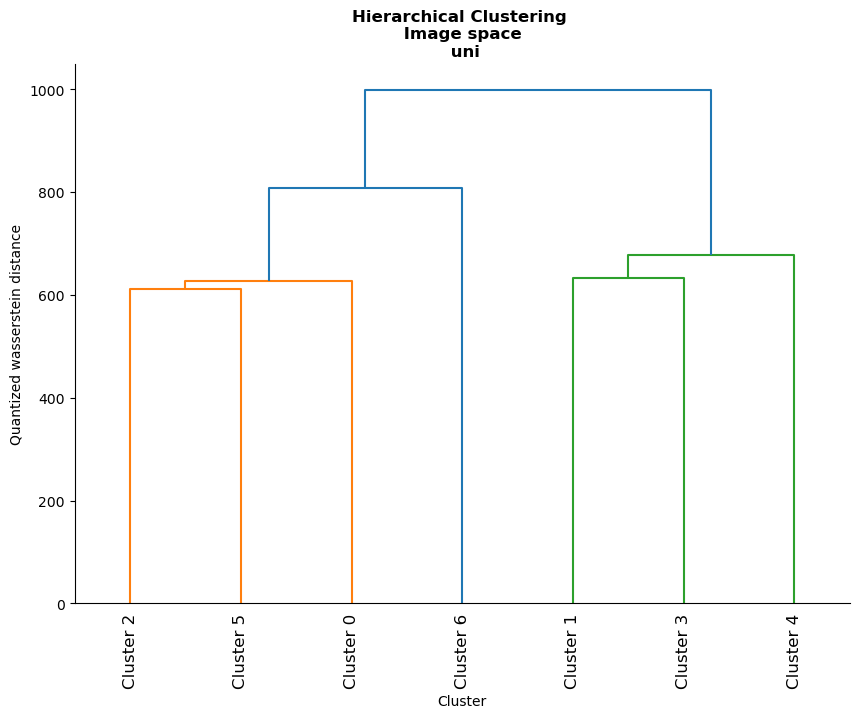

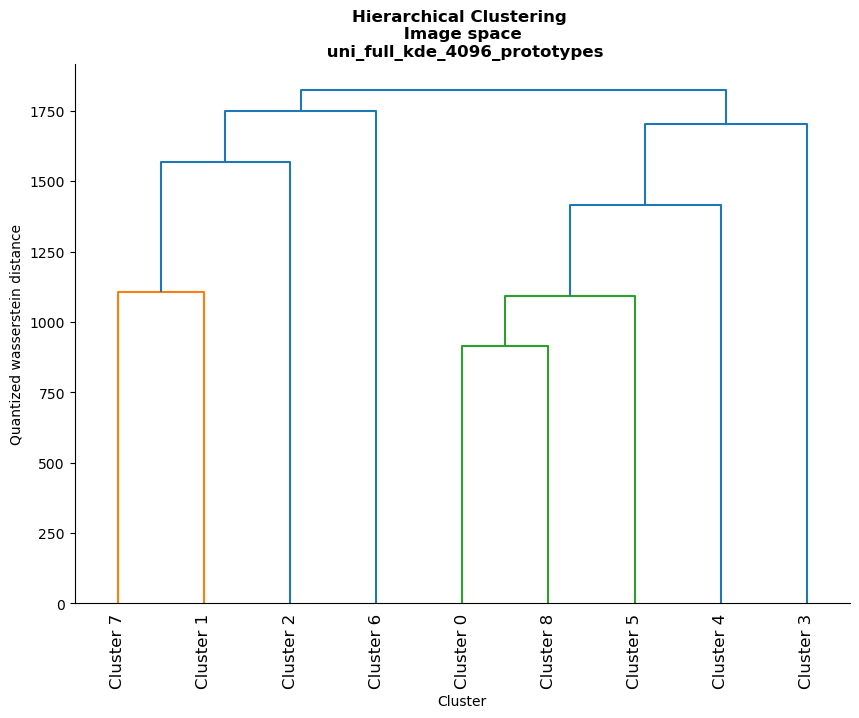

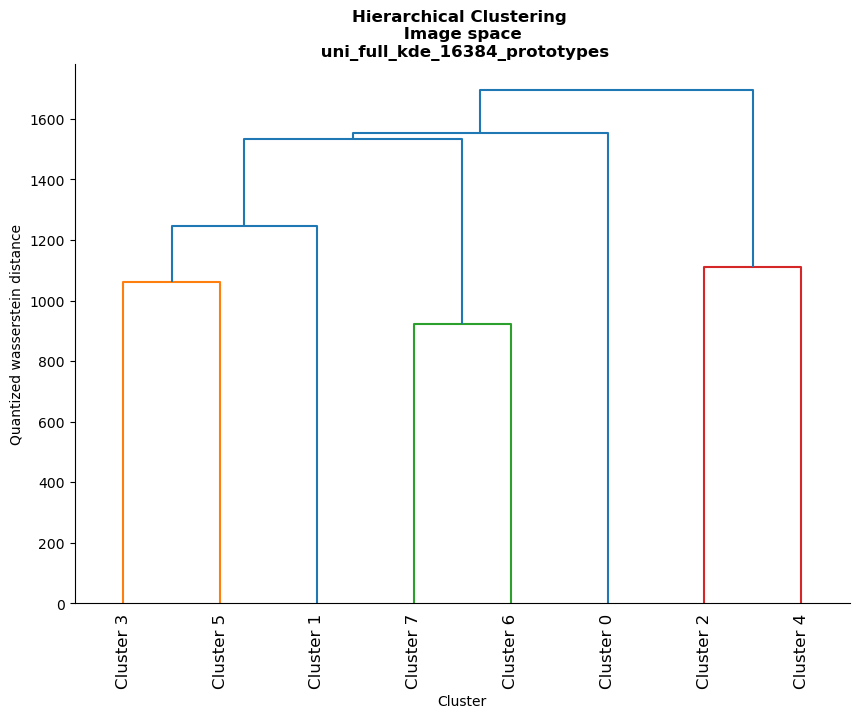

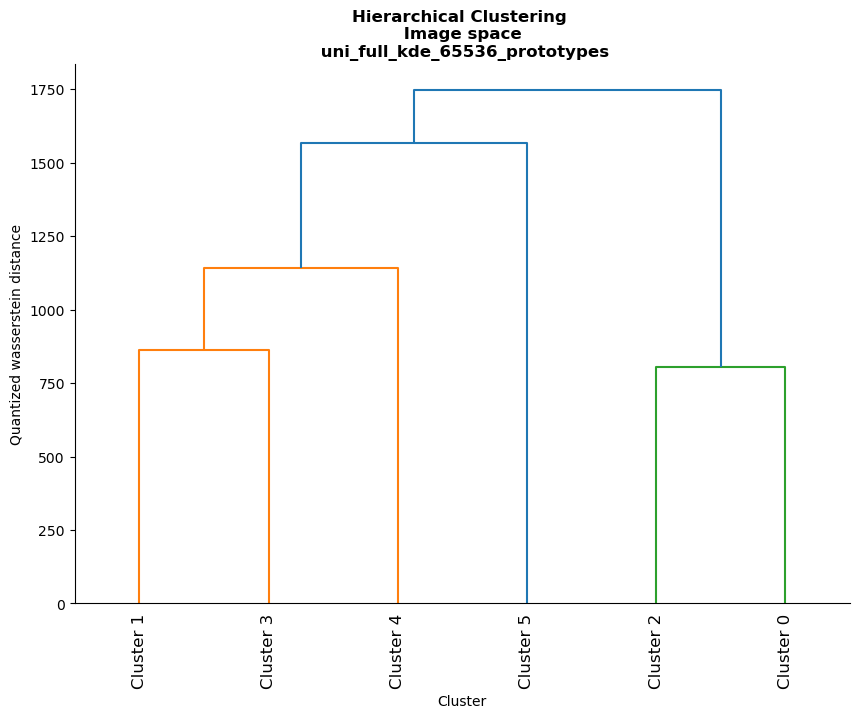

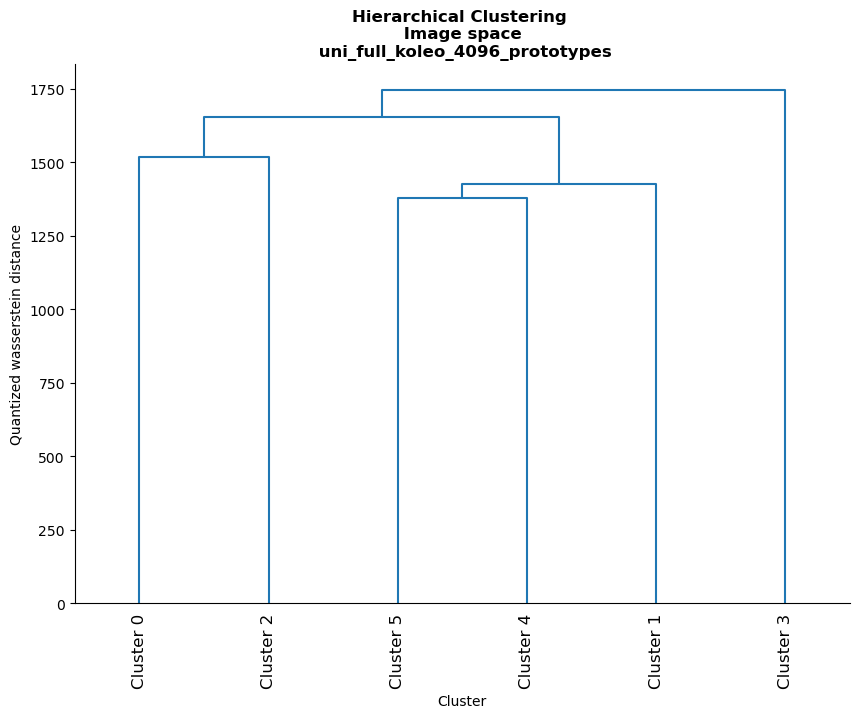

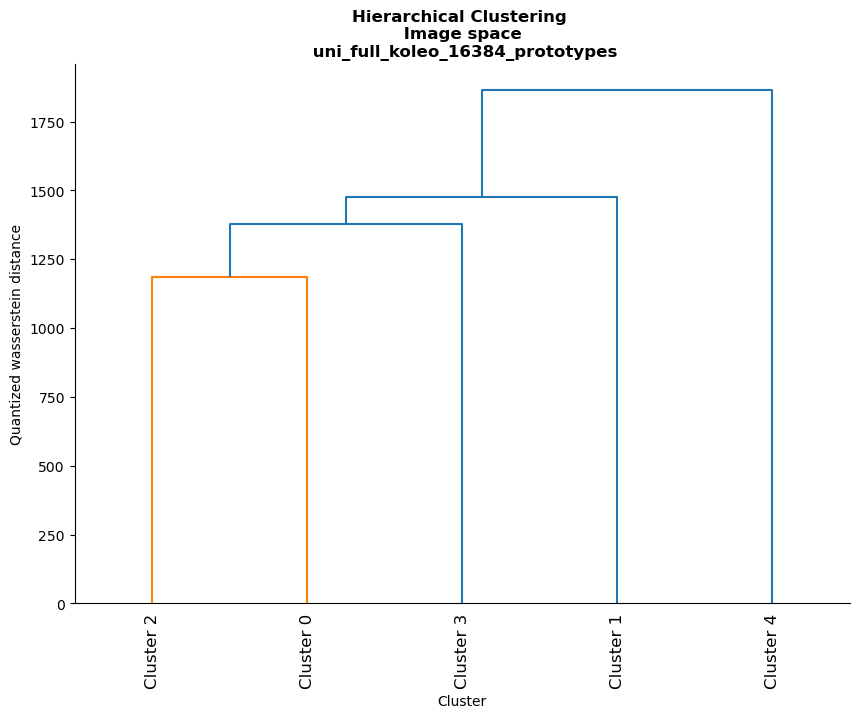

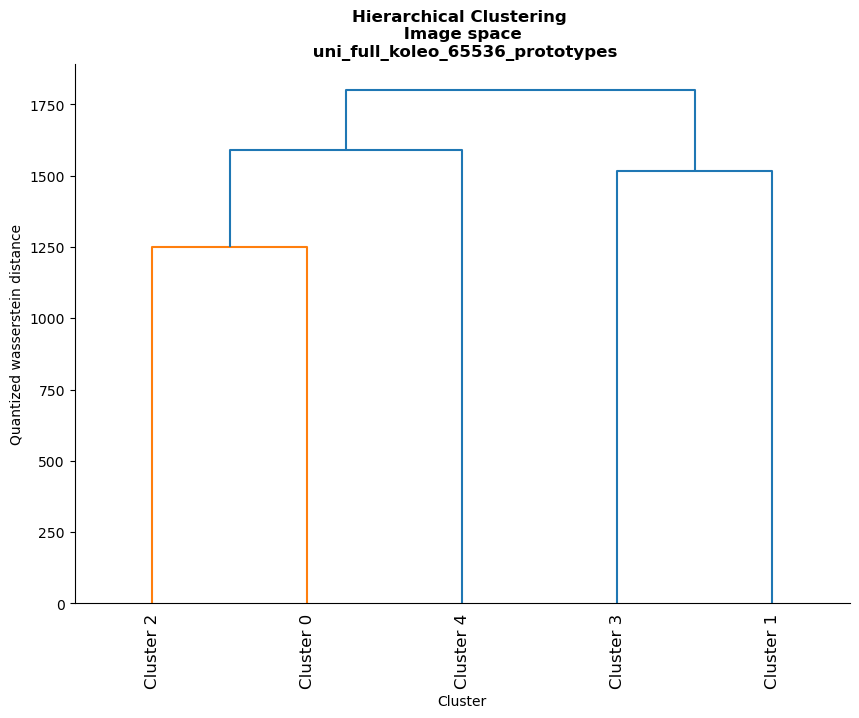

In [7]:
for model_type, names, benchmark_path in zip(
  [config['retrained_model_list1_type'], config['retrained_model_list2_type']],
  [config['retrained_model_list1'], config['retrained_model_list2']],
  [config['retrained_benchmark_folder1'], config['retrained_benchmark_folder2']]):

  path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")
  opti_clusters = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, "kmeans", "opti_clusters.csv"), index_col=0)
  
  for name in names:

        path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")
        filenames = glob.glob(os.path.join(path_to_invasive_cancer_clustering_results, f"kmeans/{name}/quantized_wasserstein_distance_{name}_{opti_clusters.loc[name, 'n_clusters']}_clusters.csv"))
        
        for filename in filenames:
            base_name = os.path.basename(filename)
            quantized_wasserstein = pd.read_csv(filename, index_col=0)
            quantized_wasserstein.columns = [f"Cluster {col}" for col in quantized_wasserstein.columns]
            quantized_wasserstein.index = [f"Cluster {idx}" for idx in quantized_wasserstein.index]

            # Perform hierarchical clustering
            linked = sch.linkage(squareform(quantized_wasserstein), method='complete')

            # Plot the dendrogram
            plt.figure(figsize=(10, 7))
            dendrogram = sch.dendrogram(linked, labels=quantized_wasserstein.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)
            plt.title(f'Hierarchical Clustering \n Image space \n {name}', weight='bold')
            plt.xlabel('Cluster')
            plt.ylabel('Quantized wasserstein distance')
            plt.xticks(rotation=90)
            sns.despine()
            
            plt.savefig(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"dendrogram_{base_name.split('.csv')[0]}.pdf"), bbox_inches='tight')

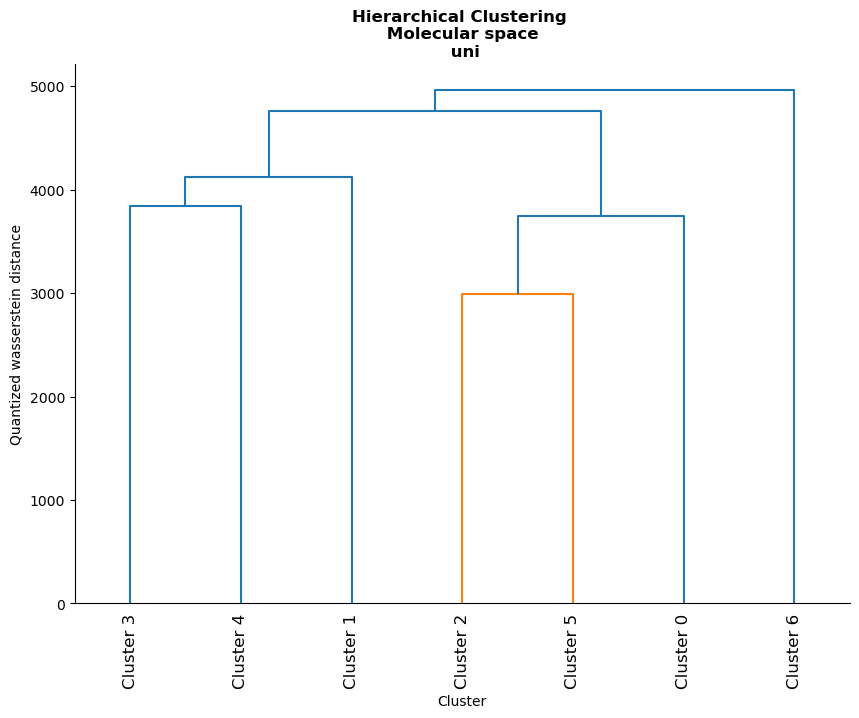

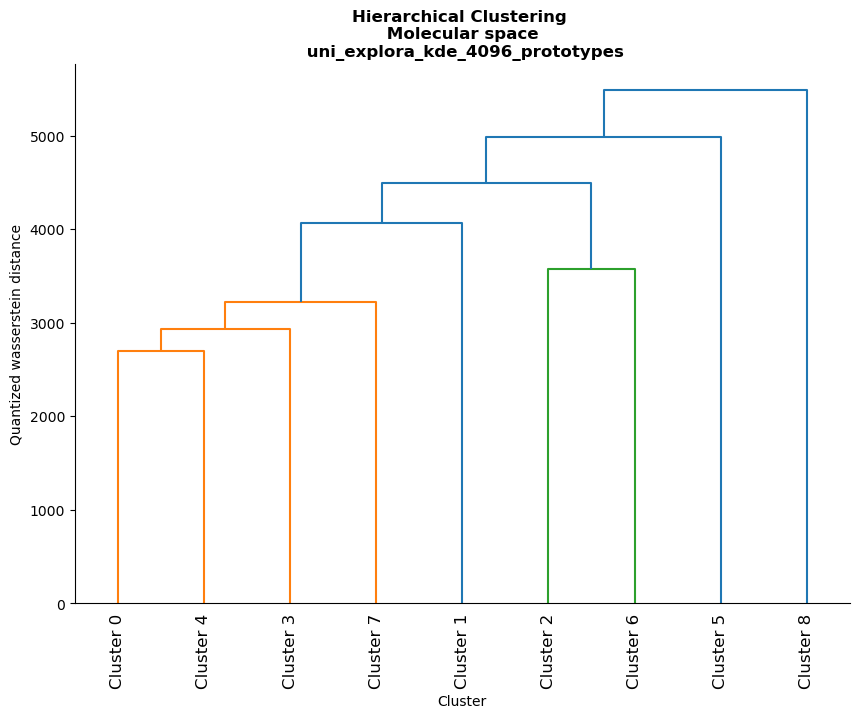

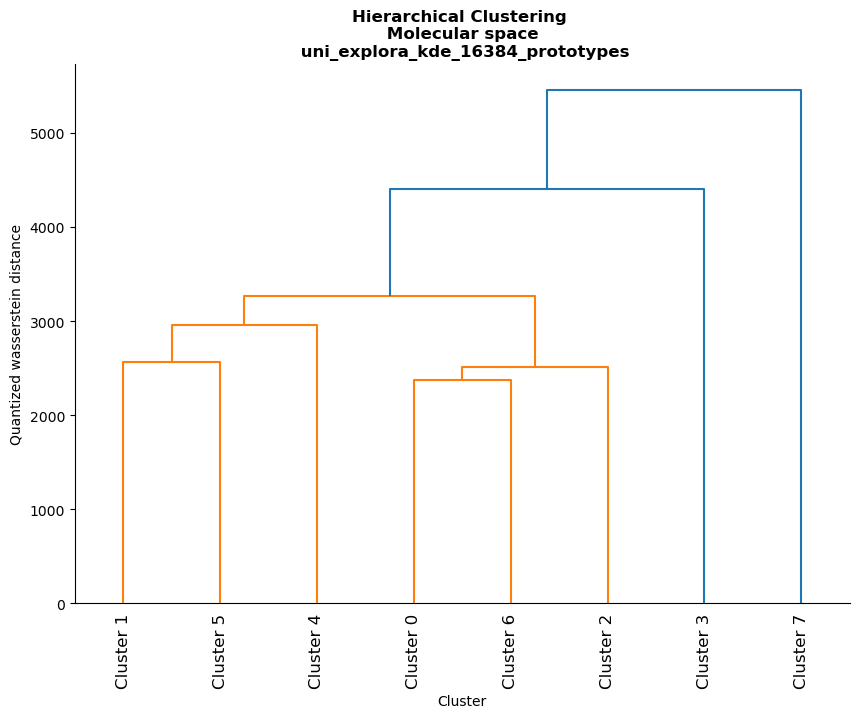

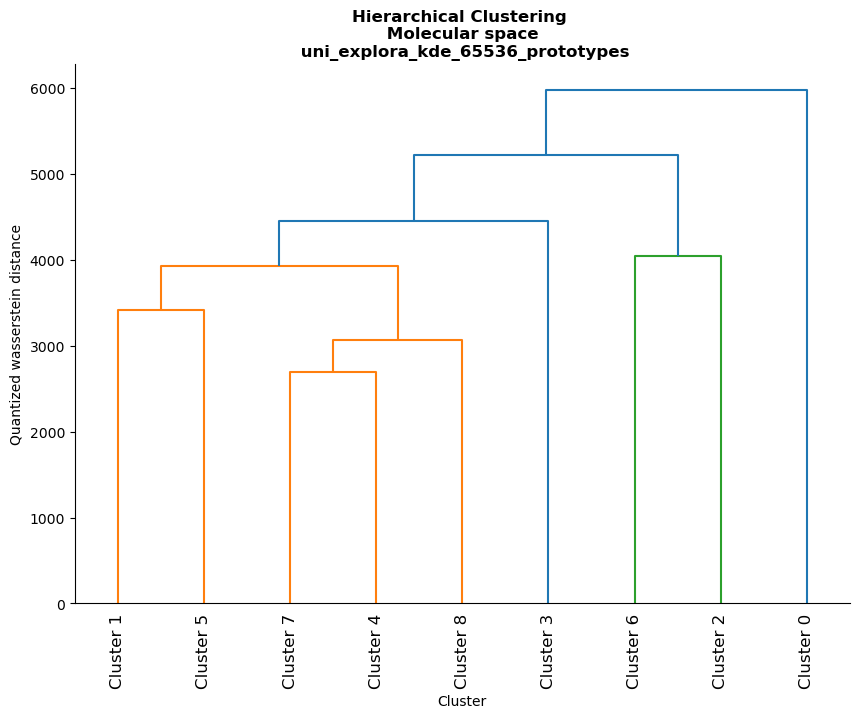

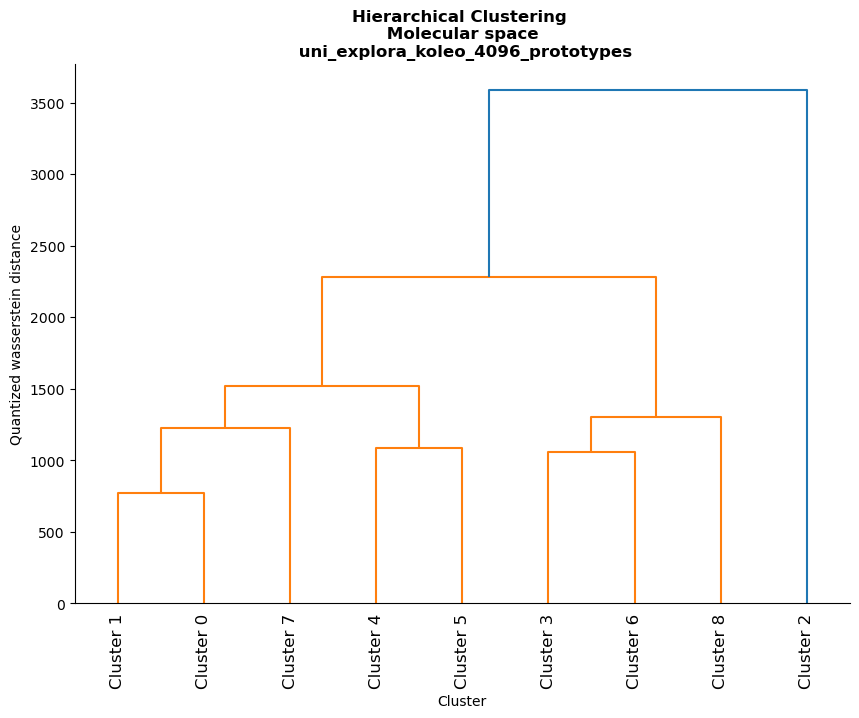

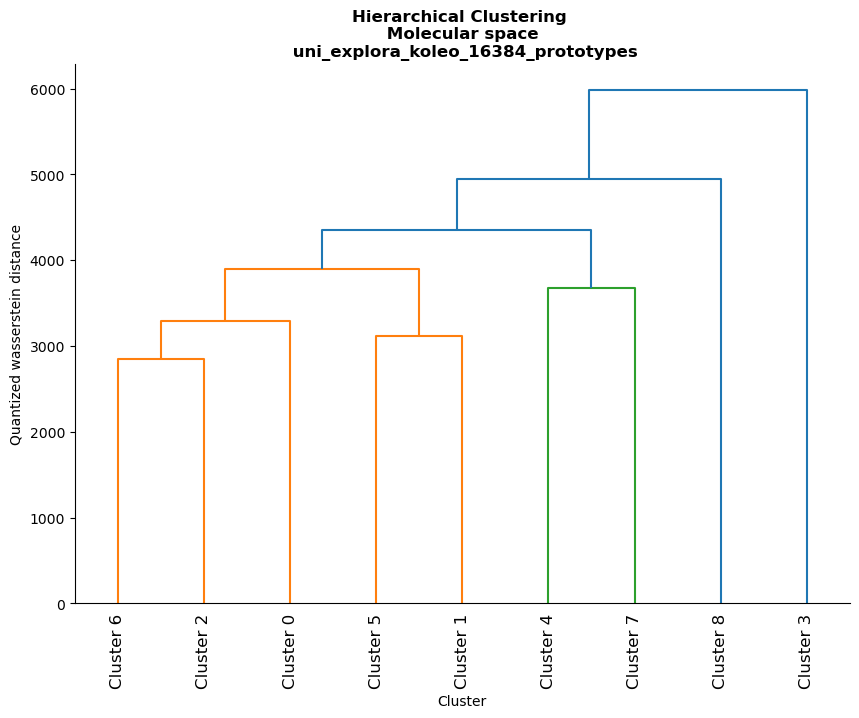

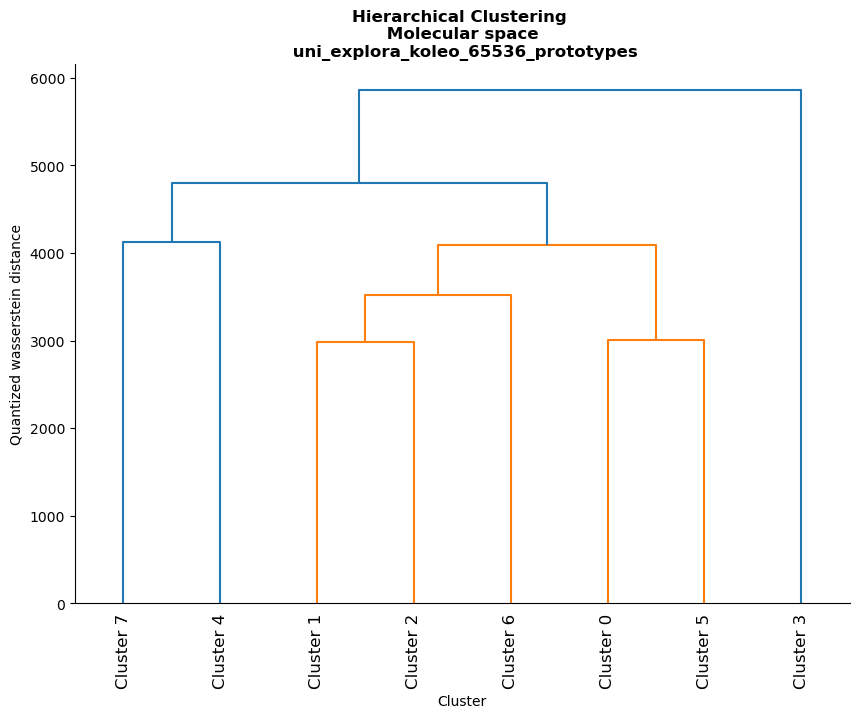

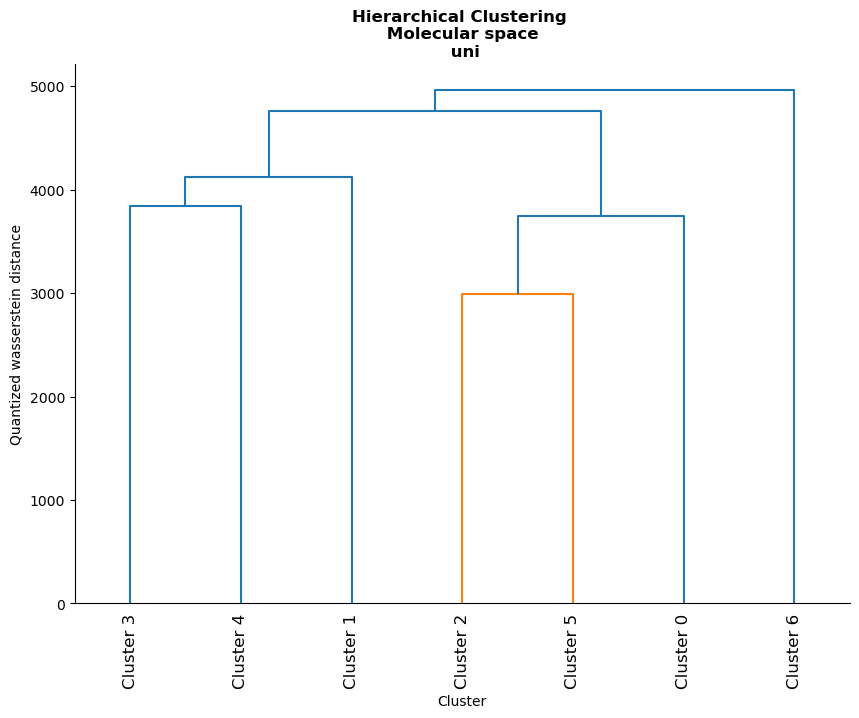

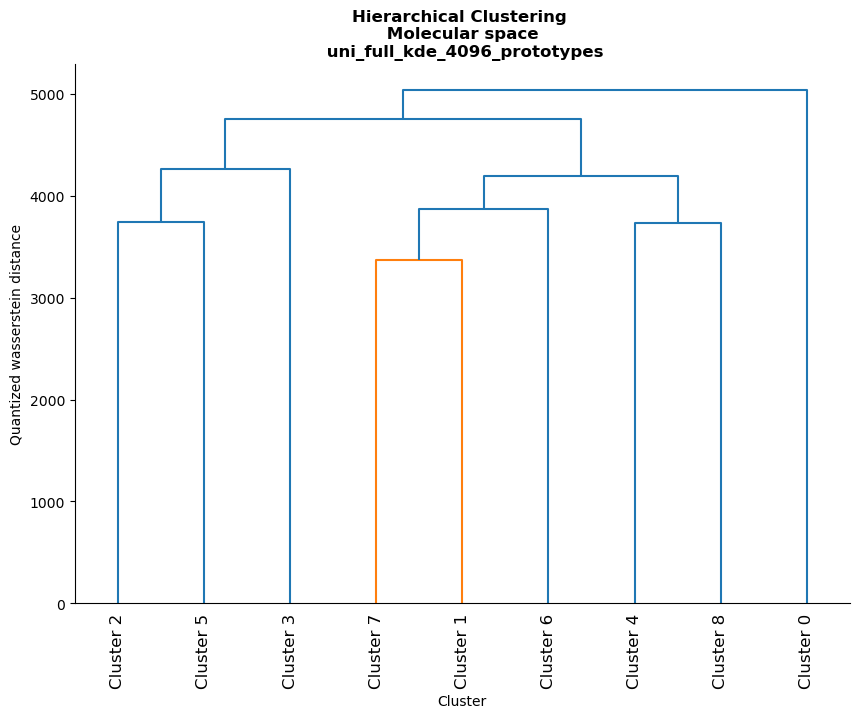

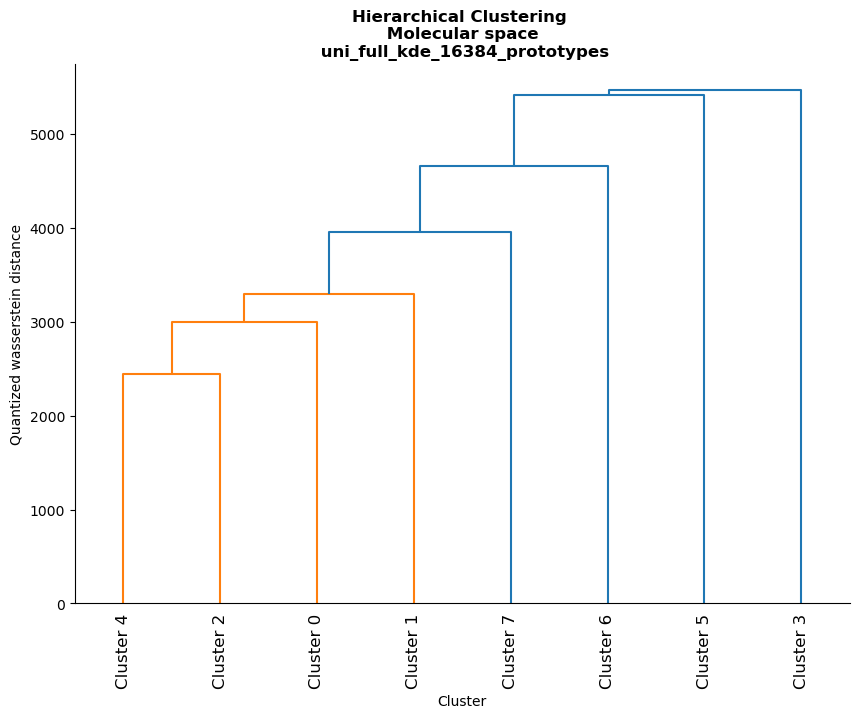

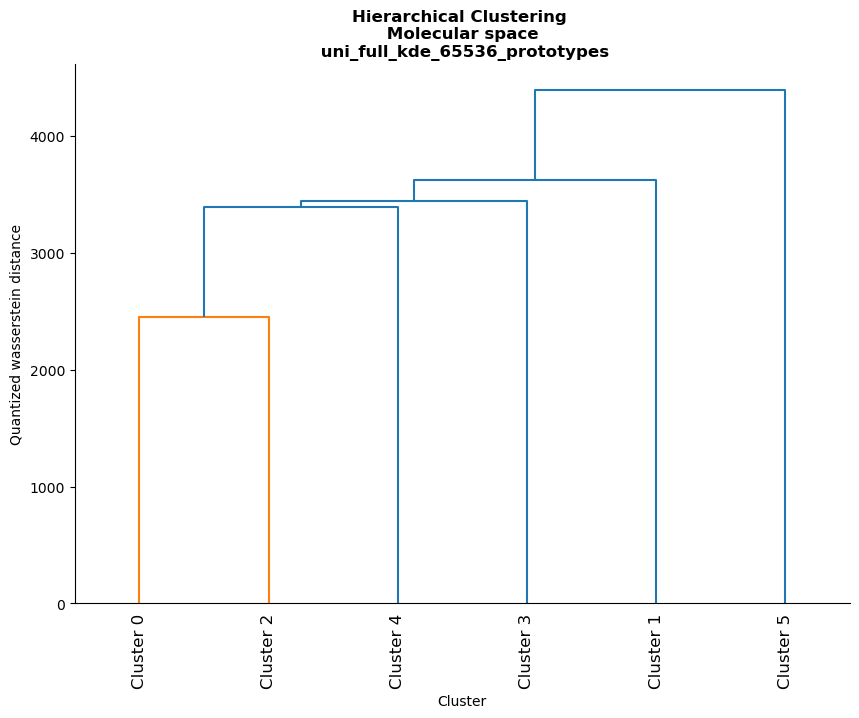

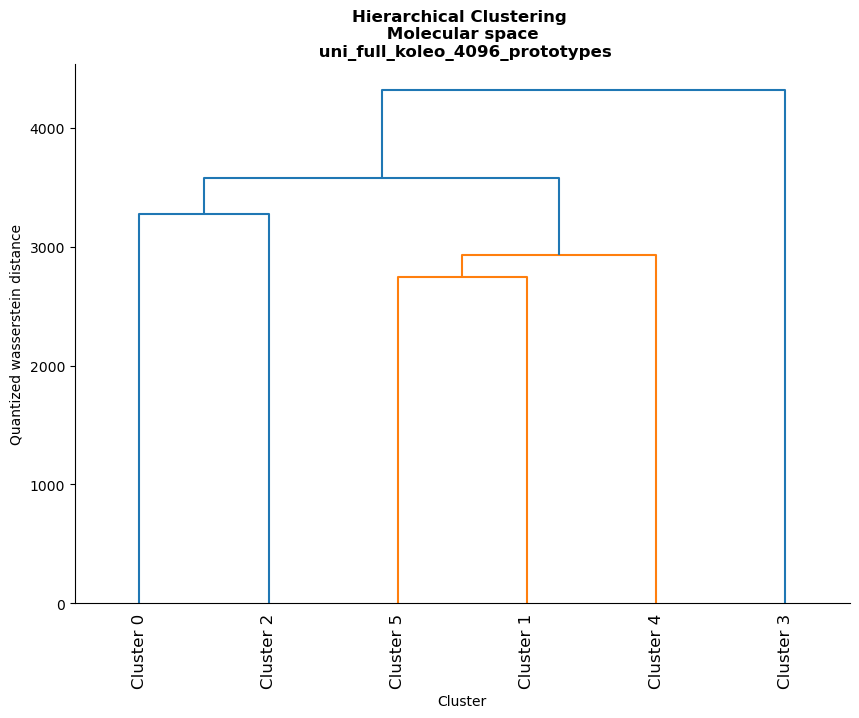

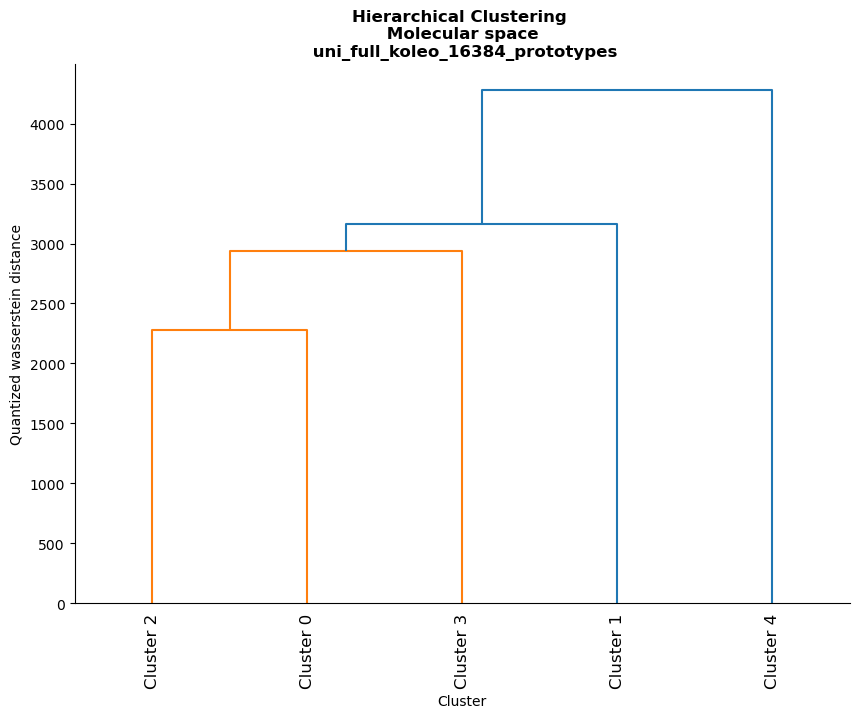

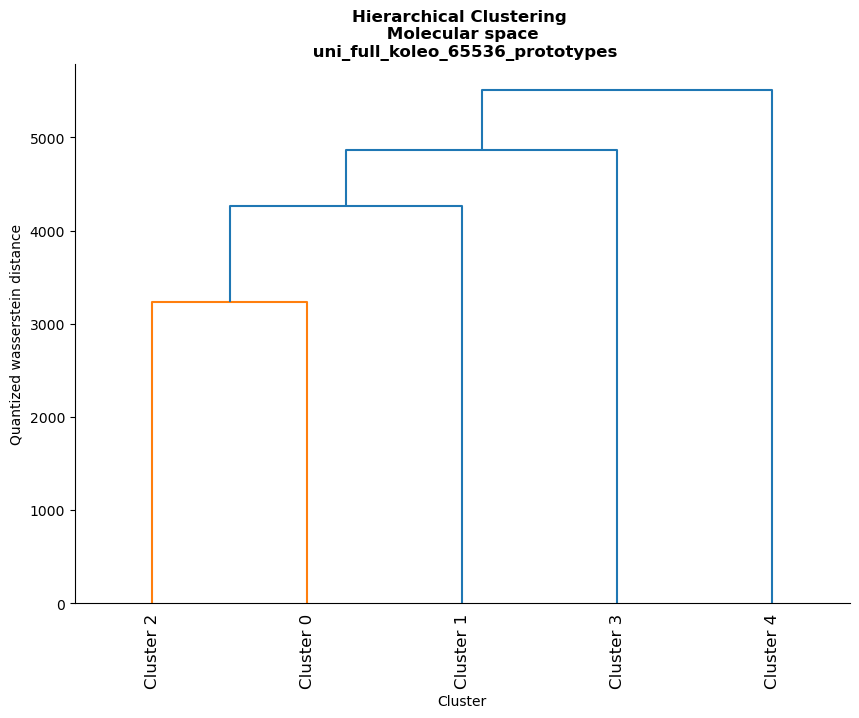

In [8]:
for model_type, names, benchmark_path in zip(
  [config['retrained_model_list1_type'], config['retrained_model_list2_type']],
  [config['retrained_model_list1'], config['retrained_model_list2']],
  [config['retrained_benchmark_folder1'], config['retrained_benchmark_folder2']]):

  path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")
  opti_clusters = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, "kmeans", "opti_clusters.csv"), index_col=0)
  
  for name in names:

        path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")
        filenames = glob.glob(os.path.join(path_to_invasive_cancer_clustering_results, f"kmeans/{name}/quantized_wasserstein_distance_{name}_molecular_raw_filtered_normalized_{opti_clusters.loc[name, 'n_clusters']}_clusters.csv"))
        
        for filename in filenames:
            base_name = os.path.basename(filename)
            quantized_wasserstein = pd.read_csv(filename, index_col=0)
            quantized_wasserstein.columns = [f"Cluster {col}" for col in quantized_wasserstein.columns]
            quantized_wasserstein.index = [f"Cluster {idx}" for idx in quantized_wasserstein.index]

            # Perform hierarchical clustering
            linked = sch.linkage(squareform(quantized_wasserstein), method='complete')

            # Plot the dendrogram
            plt.figure(figsize=(10, 7))
            dendrogram = sch.dendrogram(linked, labels=quantized_wasserstein.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)
            plt.title(f'Hierarchical Clustering \n Molecular space \n {name}', weight='bold')
            plt.xlabel('Cluster')
            plt.ylabel('Quantized wasserstein distance')
            plt.xticks(rotation=90)
            sns.despine()
            
            plt.savefig(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"dendrogram_{base_name.split('.csv')[0]}.pdf"), bbox_inches='tight')

Common clusters between B and C: [0, 2, 3, 4, 5, 6]
Common clusters between B and D: [0, 2, 3, 4, 5, 6]
Common clusters between B and E: [0, 2, 3, 4, 5, 6]
Common clusters between B and F: [0, 2, 3, 4, 5, 6]
Common clusters between B and G: [0, 2, 3, 4, 5, 6]
Common clusters between B and H: [0, 2, 3, 4, 5, 6]
Common clusters between C and D: [0, 2, 3, 4, 5, 6]
Common clusters between C and E: [0, 2, 3, 4, 5, 6]
Common clusters between C and F: [0, 2, 3, 4, 5, 6]
Common clusters between C and G: [0, 2, 3, 4, 5, 6]
Common clusters between C and H: [0, 2, 3, 4, 5, 6]
Common clusters between D and E: [0, 1, 2, 3, 4, 5, 6]
Common clusters between D and F: [0, 1, 2, 3, 4, 5, 6]
Common clusters between D and G: [0, 1, 2, 3, 4, 5, 6]
Common clusters between D and H: [0, 1, 2, 3, 4, 5, 6]
Common clusters between E and F: [0, 1, 2, 3, 4, 5, 6]
Common clusters between E and G: [0, 1, 2, 3, 4, 5, 6]
Common clusters between E and H: [0, 1, 2, 3, 4, 5, 6]
Common clusters between F and G: [0, 1, 2, 

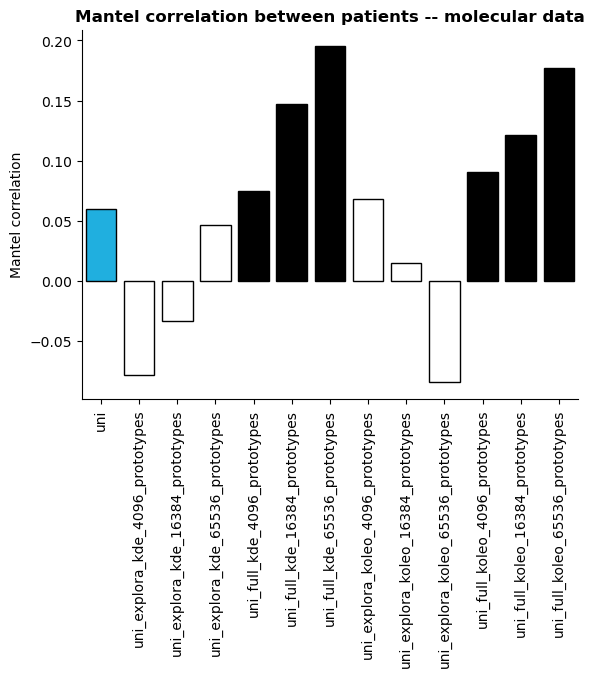

In [10]:
patients = ["B", "C", "D", "E", "F","G", "H"]

results_mantel = {}

for model_type, names, benchmark_path in zip(
  [config['retrained_model_list1_type'], config['retrained_model_list2_type']],
  [config['retrained_model_list1'], config['retrained_model_list2']],
  [config['retrained_benchmark_folder1'], config['retrained_benchmark_folder2']]):
    
    path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")
    opti_clusters = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, "kmeans", "opti_clusters.csv"), index_col=0)
    
    optimal_cluster_numbers = opti_clusters.loc[names, 'n_clusters'].values

    for name, cluster_number in zip(names, optimal_cluster_numbers):
        
        results_mantel[name] = {}

        filename = glob.glob(os.path.join(
            path_to_invasive_cancer_clustering_results, config["invasive_cancer_clustering_algo"], name, 
            f"quantized_wasserstein_distance_molecular_raw_filtered_normalized_{name}_{cluster_number}_clusters_patient_B.csv"))[0]
        cluster_number = os.path.basename(filename).split("_")[-4]
        
        mantel_correlations = []
        
        for i in range(len(patients)):
            for j in range(i+1, len(patients)):
                distance_matrix1 = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"quantized_wasserstein_distance_molecular_raw_filtered_normalized_{name}_{cluster_number}_clusters_patient_{patients[i]}.csv"), index_col=0)
                distance_matrix2 = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"quantized_wasserstein_distance_molecular_raw_filtered_normalized_{name}_{cluster_number}_clusters_patient_{patients[j]}.csv"), index_col=0)
                    
                # Find the common clusters
                common_clusters = list(set(distance_matrix1.index).intersection(set(distance_matrix2.index)))
                distance_matrix1 = distance_matrix1.loc[common_clusters][[str(cluster) for cluster in common_clusters]]
                distance_matrix2 = distance_matrix2.loc[common_clusters][[str(cluster) for cluster in common_clusters]]
                print(f"Common clusters between {patients[i]} and {patients[j]}: {common_clusters}")
                    
                if len(common_clusters) < 3:
                    mantel_correlations.append(np.nan)
                else:
                    mantel_corr = mantel.test(distance_matrix1.values, distance_matrix2.values, perms=1000, method='spearman', tail='upper')
                    mantel_correlations.append(mantel_corr.r)
        
        results_mantel[name] = mantel_correlations

df = pd.DataFrame(results_mantel)[
    ["uni",
    "uni_explora_kde_4096_prototypes", "uni_explora_kde_16384_prototypes", "uni_explora_kde_65536_prototypes",
    "uni_full_kde_4096_prototypes", "uni_full_kde_16384_prototypes", "uni_full_kde_65536_prototypes",
    "uni_explora_koleo_4096_prototypes", "uni_explora_koleo_16384_prototypes", "uni_explora_koleo_65536_prototypes",
    "uni_full_koleo_4096_prototypes", "uni_full_koleo_16384_prototypes", "uni_full_koleo_65536_prototypes"]]

palette_basic=[
    "deepskyblue", "white", "white", "white", "black",  "black", "black", 
    "white", "white", "white", "black", "black", "black"]

sns.barplot(df, palette=palette_basic, edgecolor='black', errorbar=None)
plt.xticks(rotation=90)
sns.despine()
plt.title("Mantel correlation between patients -- molecular data", weight='bold')
plt.ylabel("Mantel correlation")
plt.savefig(os.path.join(config['figures_folder'], "Figure4", "mantel_correlation_dendrogram_patients_raw_filtered_normalized_data.pdf"), bbox_inches='tight')

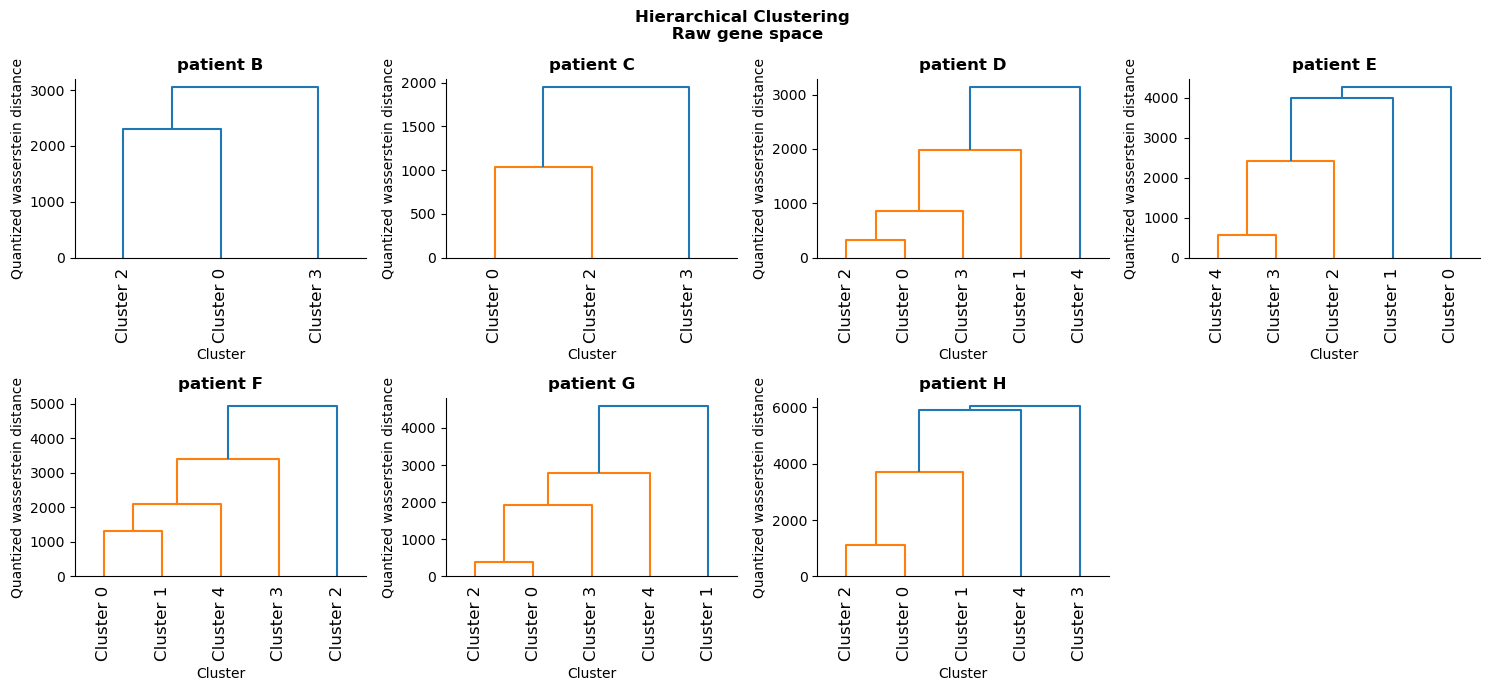

In [16]:
model_of_interest = "uni_full_koleo_16384_prototypes"

plt.figure(figsize=(15, 7))

for i, patient in enumerate(["B", "C", "D", "E", "F","G", "H"]):
    quantized_wasserstein = pd.read_csv(os.path.join(
        path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], model_of_interest,
        f"quantized_wasserstein_distance_molecular_raw_filtered_normalized_{model_of_interest}_5_clusters_patient_{patient}.csv"), index_col=0)

    quantized_wasserstein.columns = [f"Cluster {col}" for col in quantized_wasserstein.columns]
    quantized_wasserstein.index = [f"Cluster {idx}" for idx in quantized_wasserstein.index]

    # Perform hierarchical clustering
    linked = sch.linkage(squareform(quantized_wasserstein), method='complete')
    
    # Plot the dendrogram
    plt.subplot(2, 4, i+1)
    dendrogram = sch.dendrogram(linked, labels=quantized_wasserstein.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'patient {patient}', weight='bold')
    plt.xlabel('Cluster')
    plt.ylabel('Quantized wasserstein distance')
    plt.xticks(rotation=90)
    sns.despine()

plt.suptitle(f'Hierarchical Clustering \n Raw gene space', weight='bold')

plt.tight_layout()
plt.savefig(os.path.join(config['figures_folder'], "Figure4", "dendrograms_per_patient_invasive_molecular_raw.pdf"), bbox_inches='tight')
